<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/manual_two_layers_four_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 neural network with 3 inputs, 4 neurons in the first (hidden) layer, and 1 output neuron,

Use this data https://raw.githubusercontent.com/werowe/HypatiaAcademy/refs/heads/master/ml/log-neuron.txt


Input Layer (4) ---> [ 3 Neurons in Hidden Layer ] ---> Output Layer (1)


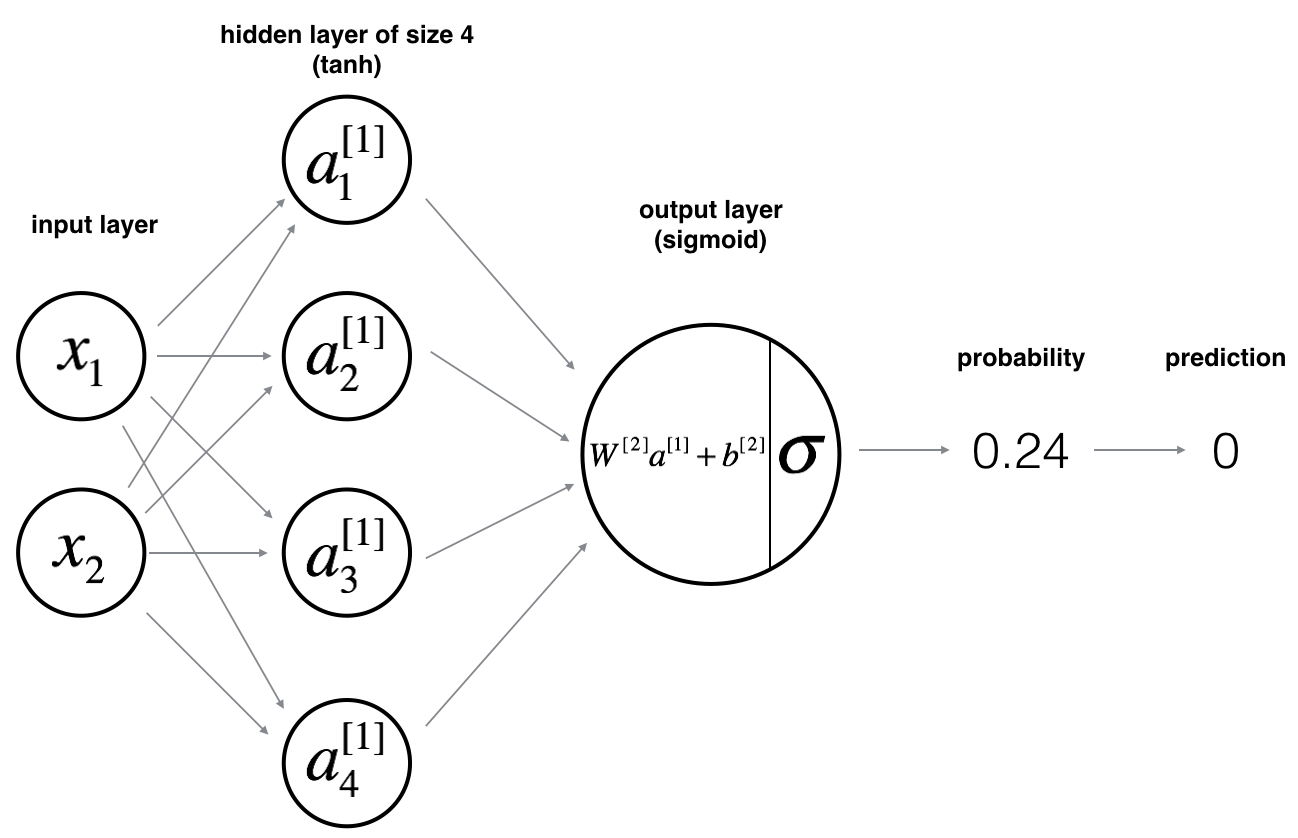

In [2]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Helper function: Sigmoid and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    # a = sigmoid(z)
    return a * (1 - a)

# Binary cross-entropy loss and its derivative
def loss(y_hat, y):
    eps = 1e-8  # for numerical stability
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def dloss_dyhat(y_hat, y):
    eps = 1e-8
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return - (y / y_hat) + (1 - y) / (1 - y_hat)

# Initialize weights and biases
W1 = np.random.randn(4, 3)   # (hidden: 4 neurons x 3 inputs)
b1 = np.random.randn(4)      # (hidden: 4,)
W2 = np.random.randn(1, 4)   # (output: 1 neuron x 4 hidden)
b2 = np.random.randn(1)      # (output: 1,)

# Single input (3 features) and label
x = np.array([0.5, 1.2, -0.7])
y = 1

# --- FORWARD PASS ---
# Hidden layer
z1 = np.dot(W1,x) + b1              # shape: (4,)
a1 =  np.tanh(z1)              # shape: (4,)

print("output Z layer 1", z1)
print("activation a1 layer 1 ",a1)


# Output layer
z2 = np.dot(W2,a1) + b2             # shape: (1,)
y_hat = sigmoid(z2)[0]        # scalar

print("\noutput Z layer 2 (ouput layer)", z2)
print("activation a2 layer 2 ",y_hat)

# Calculate loss
loss_value = loss(y_hat, y)

print("\nloss y={} y_hat {}".format(y,y_hat))


# --- BACKPROPAGATION (Manual) ---
lr = 0.01  # learning rate

# Output layer gradients
dz2 = y_hat - y                         # derivative of loss w.r.t z2, shape: (1,)
dW2 = dz2 * a1                          # (1,) * (4,) = (4,) -> broadcast to (1,4)
db2 = dz2

# Hidden layer gradients
da1 = W2.T * dz2                        # shape: (4,1) * scalar = (4,1) -> (4,)
dz1 = da1.flatten() * sigmoid_derivative(a1)   # shape: (4,)

dW1 = dz1[:, None] * x[None, :]         # (4,1) * (1,3) = (4,3)
db1 = dz1                               # (4,)

# --- Update weights and biases (Gradient Descent) ---
W2 -= lr * dW2[None, :]                 # (1,4)
b2 -= lr * db2
W1 -= lr * dW1                          # (4,3)
b1 -= lr * db1                          # (4,)

print("\nBACKPROPAGATION:")
print("dW2:", dW2)
print("db2:", db2)
print("dW1:", dW1)
print("db1:", db1)


output Z layer 1 [-0.12897979 -1.2688535   0.31424232 -0.52109791]
activation a1 layer 1  [-0.12826929 -0.85348661  0.30429156 -0.47854694]

output Z layer 2 (ouput layer) [1.72690756]
activation a2 layer 2  0.8490164354238454

loss y=1 y_hat 0.8490164354238454

BACKPROPAGATION:
dW2: [ 0.01936655  0.12886245 -0.04594302  0.07225272]
db2: -0.15098356457615458
dW1: [[-0.01106553 -0.02655727  0.01549174]
 [ 0.03752818  0.09006762 -0.05253945]
 [ 0.01451156  0.03482775 -0.02031619]
 [-0.07543753 -0.18105006  0.10561254]]
db1: [-0.02213106  0.07505635  0.02902313 -0.15087505]


#Formulas for Computing Derivatives


## Forward Propagation

$
Z^{[1]} = W^{[1]}X + b^{[1]}
$

$
A^{[1]} = g^{[1]}(Z^{[1]})
$

$
Z^{[2]} = W^{[2]}A^{[2]} + b^{[2]}
$

$
A^{[2]} = g^{[2]}(Z^{[2]}) = \sigma(Z^{[2]})
$


--------
## Back Propagation

$
dZ^{[2]} = A^{[2]} - Y
$

$
dW^{[2]} = \frac{1}{m} \ dZ^{[2]} A^{[1]T}
$

$
db^{[2]} = \frac{1}{m} \ \text{np.sum}(dZ^{[2]}, \text{axis}=1, \text{keepdims}=True)
$

> **Note**: The **element wise product** $*$ is used below:

$
dZ^{[1]} = W^{[2]^\top} dZ^{[2]} * g^{[1]'}(Z^{[1]})
$

$
dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T
$

$
db^{[1]} = \frac{1}{m} \ \text{np.sum}(dZ^{[1]}, \text{axis}=1, \text{keepdims}=True)
$
